In [100]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import cmocean.cm as cmo
import xarray as xr
from datetime import datetime, timedelta
import cartopy

In [101]:
file = 'ADCP_PP/230504_STA'

Ens = scipy.io.loadmat(file + '_east.mat')['ConEnsembles'].astype(int)
print(len(Ens))
# Load U Velocity Data (east)
U = scipy.io.loadmat(file + '_east.mat')['ConVel'].astype(np.float32)*1e-3
U[U==-32.768] = np.nan

# Load V Velocity Data (north)
V = scipy.io.loadmat(file + '_north.mat')['ConVel'].astype(np.float32)*1e-3
V[V==-32.768] = np.nan

# Load bin data
bins = scipy.io.loadmat(file + '_east.mat')['RDIBin1Mid'].astype(np.float32) + (scipy.io.loadmat('ADCP_PP/v.mat')['ConBins'].astype(np.float32) - 1) * scipy.io.loadmat('ADCP_PP/v.mat')['RDIBinSize'].astype(np.float32)

# Load Time data
time = np.array(scipy.io.loadmat(file + '_east.mat')['ConHour'] * 3600 +  scipy.io.loadmat(file + '_east.mat')['ConMin'] * 60 +  scipy.io.loadmat(file + '_east.mat')['ConSec'] )
# print(time[1])
# datetime(time, 's')

750


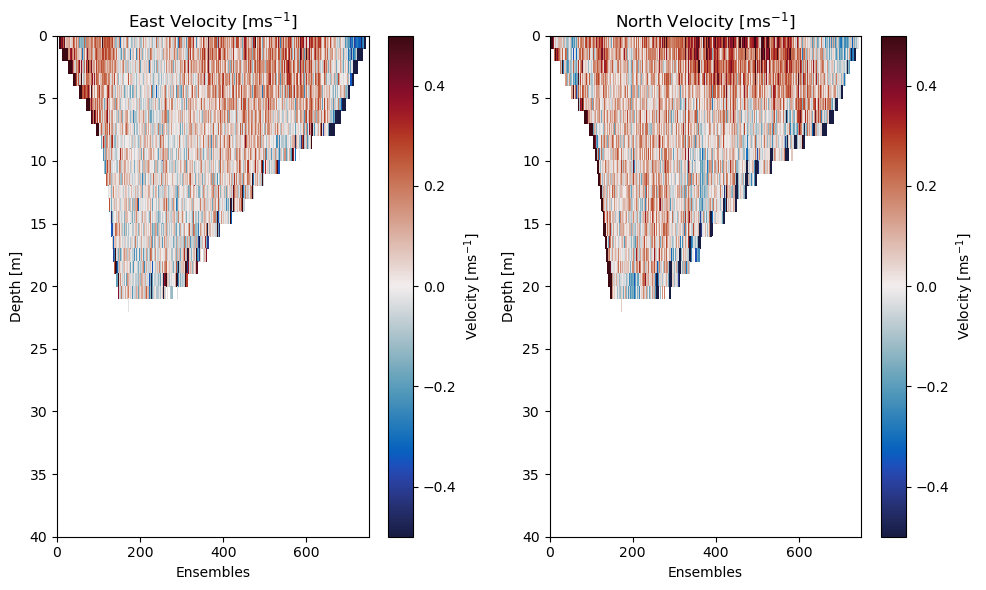

In [105]:
# Plot velocity contours
colorBarRange = [-.5, .5]
fig, ax = plt.subplots(figsize=[10,6], ncols=2)
fig0 = ax[0].pcolor(U.transpose(), cmap = cmo.balance, vmin=colorBarRange[0], vmax=colorBarRange[1])
cb0 = plt.colorbar(fig0 , ax=ax[0], label='Velocity [ms$^{-1}$]')
ax[0].set_ylim(0, 40)
ax[0].invert_yaxis()
ax[0].set(title='East Velocity [ms$^{-1}$]', xlabel='Ensembles', ylabel='Depth [m]')
# ax[0].set_aspect(1.5)

fig1 = ax[1].pcolor(V.transpose(), cmap = cmo.balance, vmin=colorBarRange[0], vmax=colorBarRange[1])
cb1 = plt.colorbar(fig1 , ax=ax[1], label='Velocity [ms$^{-1}$]')
ax[1].set_ylim(0, 40)
ax[1].invert_yaxis()
ax[1].set(title='North Velocity [ms$^{-1}$]', xlabel='Ensembles', ylabel='Depth [m]')
# ax[1].set_aspect(1.5)

plt.tight_layout()
plt.show()

In [65]:
len(Ens)

127